In [14]:
#import dependencies
from os import path, getcwd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from PIL import Image
import os, os.path
%matplotlib inline 

In [15]:
#column names
COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
#encoding
ENCODING = 'ISO-8859-1'

#read in dataframe
df = pd.read_csv(r'C:\Users\arunp\Downloads\training.1600000.processed.noemoticon.csv', encoding = ENCODING, names = COLUMNS)


In [10]:
#view raw dataset
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
#initialize sentiment list
SENTIMENT_LIST = []
tdf = df['text'].iloc[:9999] #tweet df of first 10,000 tweets

#for each tweet create a textblob and add the sentiment to list
for tweet in tdf: 
    text = TextBlob(tweet)
    sentiment = text.sentiment.polarity
    SENTIMENT_LIST.append(round(sentiment, 3))

Text(0.86, -600, 'Positive')

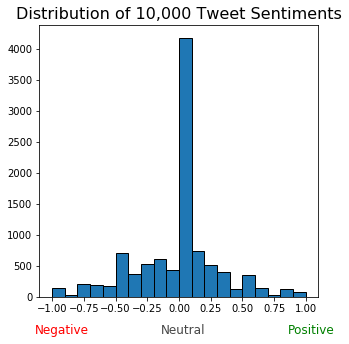

In [17]:
#create plot
fig, ax = plt.subplots(1,1, figsize = (5,5)) #create figure

#plot histogram
ax.hist(SENTIMENT_LIST, bins = 20, edgecolor = 'black') 
ax.set_title('Distribution of 10,000 Tweet Sentiments', fontsize = 16)
ax.text(-0.14, -600, 'Neutral', fontsize = 12, color = '#474747')
ax.text(-1.14, -600, 'Negative', fontsize = 12, color = 'red')
ax.text(0.86, -600, 'Positive', fontsize = 12, color = 'green')

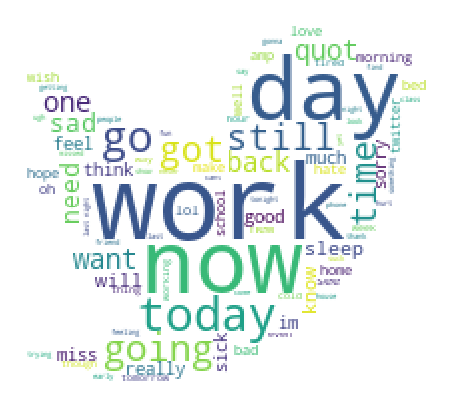

In [13]:
#write tweets in tdf to tweets.txt
with open('tweets.txt', 'w', encoding = ENCODING) as file1:
    for tweet in tdf: 
        file1.write(tweet)

#read file and convert to lower case
tweets = open("tweets.txt", "r").read()
tweets = tweets.lower()

#mask image 
cloud_image = r"C:\Users\arunp\Downloads\twt_burned.jpg"
maskArray = np.array(Image.open(cloud_image))

#create figure
plt.figure(figsize=(8,8))

#create cloud object and show on plot
cloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'white', mask = maskArray)
cloud.generate(tweets)
plt.axis('off')
plt.imshow(cloud)